## Time Series Analysis SARIMA Model

In [3]:
#Import the necessary libraries and modules
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the datatset
data = pd.read_csv(r"C:\BTC-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,14036.599609,16461.199219,14028.900391,16099.799805,16099.799805,13454300160
1,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128
2,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712
3,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160
4,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808
...,...,...,...,...,...,...,...
1822,2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050
1823,2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213
1824,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
1825,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938


## Explanatory Data Analysis

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1827.0,2.033123e+04,1.698843e+04,3.236275e+03,7.688712e+03,1.097325e+04,3.376738e+04,6.754973e+04
High,1827.0,2.083343e+04,1.743165e+04,3.275378e+03,7.915483e+03,1.130440e+04,3.477808e+04,6.878962e+04
Low,1827.0,1.976166e+04,1.647395e+04,3.191303e+03,7.518761e+03,1.065646e+04,3.226580e+04,6.638206e+04
Close,1827.0,2.033037e+04,1.698341e+04,3.236762e+03,7.684072e+03,1.097018e+04,3.373452e+04,6.756683e+04
Adj Close,1827.0,2.033037e+04,1.698341e+04,3.236762e+03,7.684072e+03,1.097018e+04,3.373452e+04,6.756683e+04
Volume,1827.0,2.658843e+10,1.982448e+10,2.923670e+09,1.259719e+10,2.432216e+10,3.580014e+10,3.509679e+11


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.corr

<bound method DataFrame.corr of             Date          Open          High           Low         Close  \
0     2017-12-26  14036.599609  16461.199219  14028.900391  16099.799805   
1     2017-12-27  16163.500000  16930.900391  15114.299805  15838.500000   
2     2017-12-28  15864.099609  15888.400391  13937.299805  14606.500000   
3     2017-12-29  14695.799805  15279.000000  14307.000000  14656.200195   
4     2017-12-30  14681.900391  14681.900391  12350.099609  12952.200195   
...          ...           ...           ...           ...           ...   
1822  2022-12-22  16818.380859  16866.673828  16592.408203  16830.341797   
1823  2022-12-23  16829.644531  16905.218750  16794.458984  16796.953125   
1824  2022-12-24  16796.976563  16864.703125  16793.527344  16847.755859   
1825  2022-12-25  16847.505859  16860.554688  16755.253906  16841.986328   
1826  2022-12-26  16839.712891  16907.525391  16831.093750  16848.796875   

         Adj Close       Volume  
0     16099.799805  1

In [8]:
data2 = data.copy()

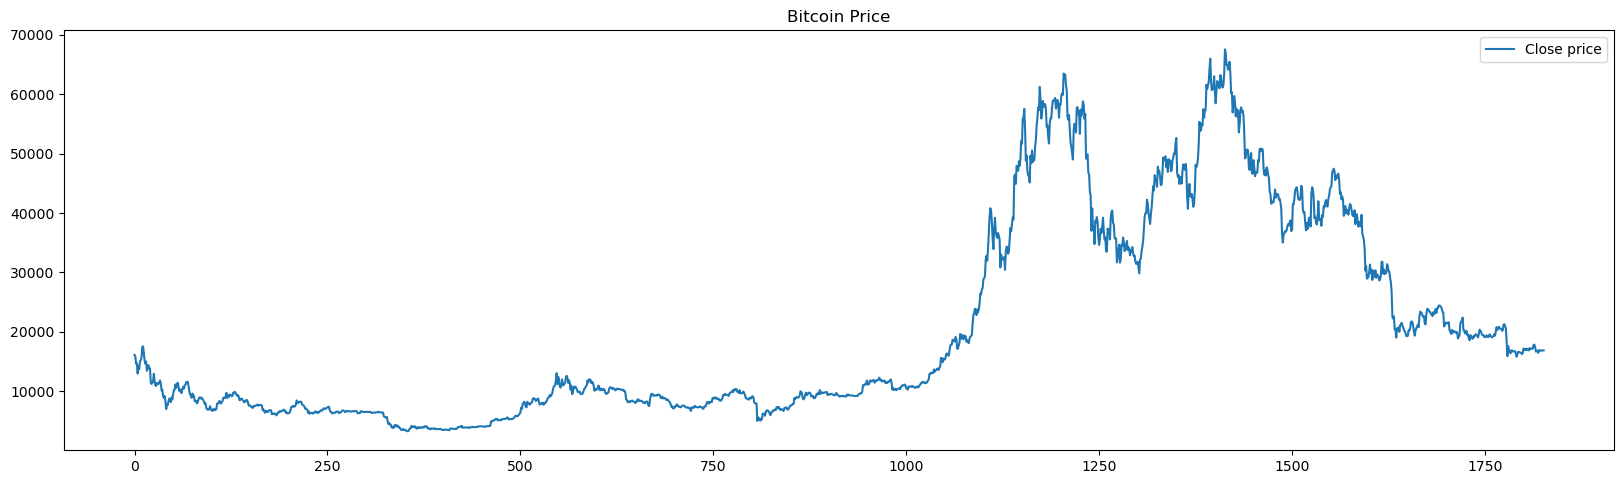

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(data.Close,label='Close price')
plt.legend()

## Data Visualization

**Since we are particularly interested in the close price and date variable from the dataset, so we'll just copy these two variables into a new dataset**

In [10]:
df = data[['Date', 'Close']]
df

,Date,Close
0,2017-12-26,16099.799805
1,2017-12-27,15838.500000
2,2017-12-28,14606.500000
3,2017-12-29,14656.200195
4,2017-12-30,12952.200195
...,...,...
1822,2022-12-22,16830.341797
1823,2022-12-23,16796.953125
1824,2022-12-24,16847.755859
1825,2022-12-25,16841.986328


**We need to group data for better understanding to it is advised to convert Date column into 'Datetime' type and extract needful information.**

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.dtypes

Date     datetime64[ns]
Close           float64
Year              int64
Month             int64
dtype: object

In [12]:
df1= df.groupby(['Date'])['Close'].mean()
print(df1.head(10))

Date
2017-12-26    16099.799805
2017-12-27    15838.500000
2017-12-28    14606.500000
2017-12-29    14656.200195
2017-12-30    12952.200195
2017-12-31    14156.400391
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
Name: Close, dtype: float64


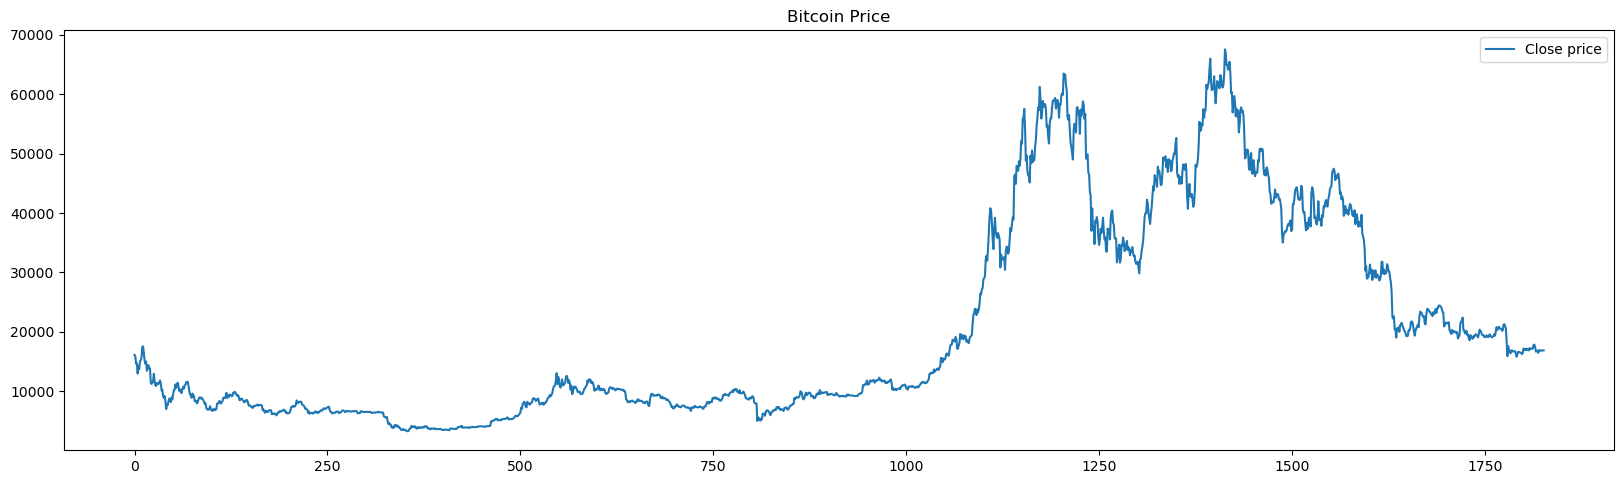

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(df.Close,label='Close price')
plt.legend()

## Stationarity

**Stationarity in a time-series data is a very important feature as it becomes relatively easier and statistically more accurate to apply time series methodologies on a stationary series and thus derive the business decisions. A data is said to be stationary if the mean, variance and autocorrelation structure do not show any difference over time. In other words, the data should not contain any trends or seasonality and has to show a constant variance and autocorrelation structure over time.
We will use ADF Test to acertain the stationarity of the Closing Price series.**

### Augmented Dickey-Fuller (ADF) TEST

**The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. The null hypothesis of ADF test is that series is non-stationary. Since ADF statistic is greater than critical values, we cannot reject the null hypothesis. Hence, this imply that the series is non-stationary.**

In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    ADF=adfuller(series)
    print(f'ADF Statistic is: {ADF[0]}')
    print(f'p-value is: {ADF[1]}')
    print(f'Number of lags: {ADF[2]}')
    print(f'Number of obs: {ADF[3]}')
    print(f'Critical Values: {ADF[4]}')
    if ADF[1] <= 0.05:
        print("Strong evidence against null hypothesis, so we reject null hypothesis")
    else:
        print("Weak evidence against null hypothesis implying we fail to reject null hypothesis")
        
adf_test(df['Close'])

ADF Statistic is: -1.369269882971864
p-value is: 0.5969166728785437
Number of lags: 24
Number of obs: 1802
Critical Values: {'1%': -3.4339840952648695, '5%': -2.8631452508003057, '10%': -2.567624583142913}
Weak evidence against null hypothesis implying we fail to reject null hypothesis


### Plotting the rolling statistics against original series

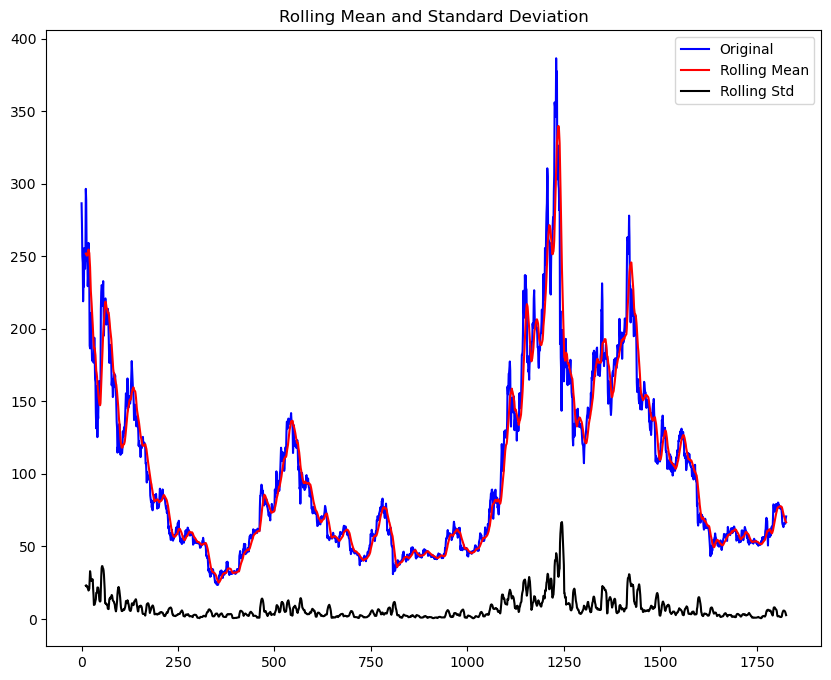

In [233]:
rolling_mean = df['Close'].rolling(12).mean()
rolling_std = df['Close'].rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(10,8))
plt.plot(df['Close'], color='blue',label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

**Through the above graph, we can see that standard deviation is fairly constant in the series but increasing mean implies the non-stationarity of the series.**

### Tranforming the series into Stationary

**There are multiple ways of transforming the a non-stationary series into stationary:**
1. Differencing
2. Scale transformation : Using log or sqaure root of the data
3. Seasonal Decomposition

#### First Differencing

In [20]:
df['Close_FD'] = df['Close']-df['Close'].shift(1)
df['Close_FD'].isnull().sum()

1

In [235]:
df['Close_FD'] = df['Close_FD'].fillna(0)

In [236]:
adf_test(df['Close_FD'])

ADF Statistic is: -12.893133531655039
p-value is: 4.4053646512059054e-24
Number of lags: 14
Number of obs: 1812
Critical Values: {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}
Strong evidence against null hypothesis, so we reject null hypothesis


<AxesSubplot:title={'center':'First Difference of Closing Price'}>

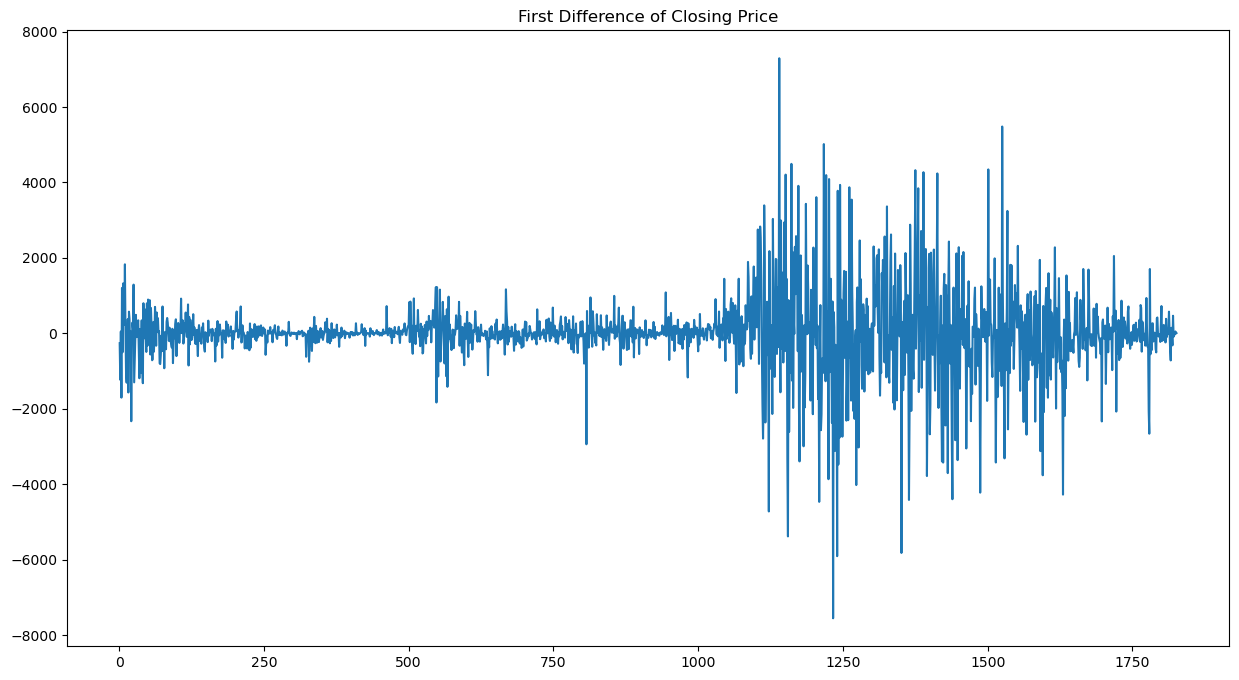

In [21]:
df['Close_FD'].plot(figsize=(15,8), title= "First Difference of Closing Price")

**After first differencing we got the stationarity in the closing price.**

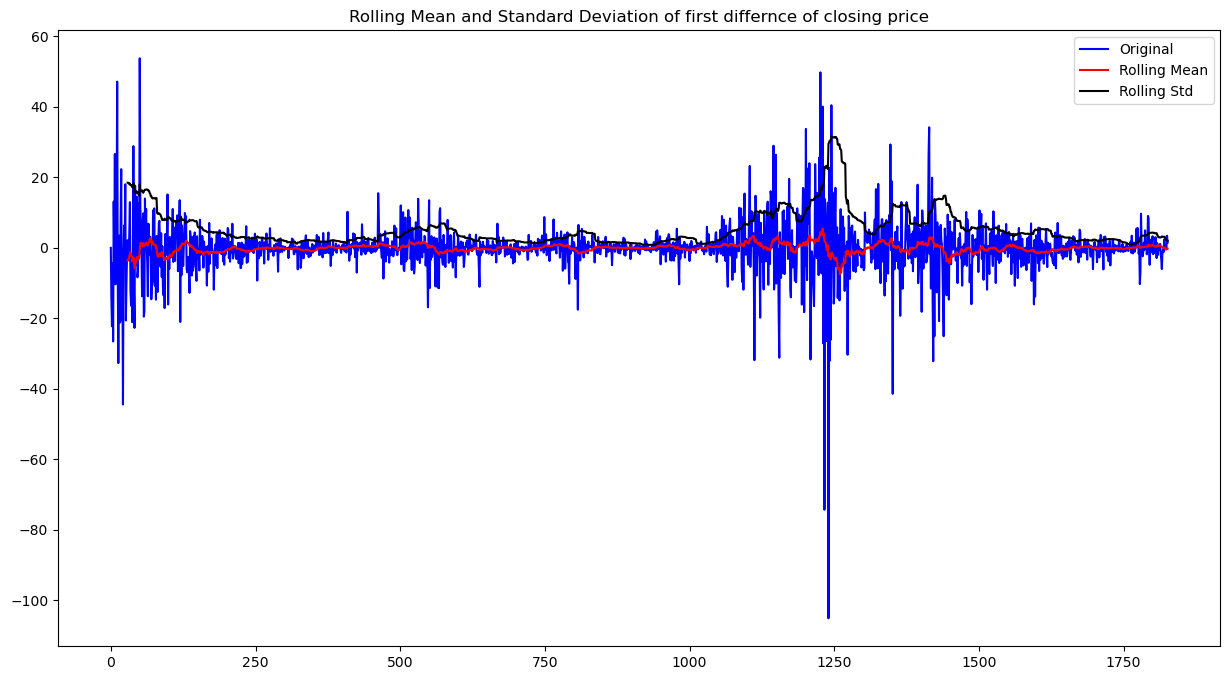

In [238]:
FDrolling_mean = df['Close_FD'].rolling(30).mean()
FDrolling_std = df['Close_FD'].rolling(30).std()

#Plot rolling statistics:
plt.figure(figsize=(15,8))
plt.plot(df['Close_FD'], color='blue',label='Original')
plt.plot(FDrolling_mean, color='red', label='Rolling Mean')
plt.plot(FDrolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of first differnce of closing price')
plt.show()

**The rolling mean and standard deviation are in line with the average trend in the series.**

#### Seasonal Decomposition

**Seasoanlity is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series. There are two types of seasonality:**

**-Additive time series: In this, the components of the time series are added together to make the time series. Visually, the increasing or decreasing pattern of the time series is similar throughout the series.**

**-Multiplicative time series: In this, the components of the time series are multiplicative together. Visually, the time series is having exponential growth or decrement with time.**

<Figure size 640x480 with 0 Axes>

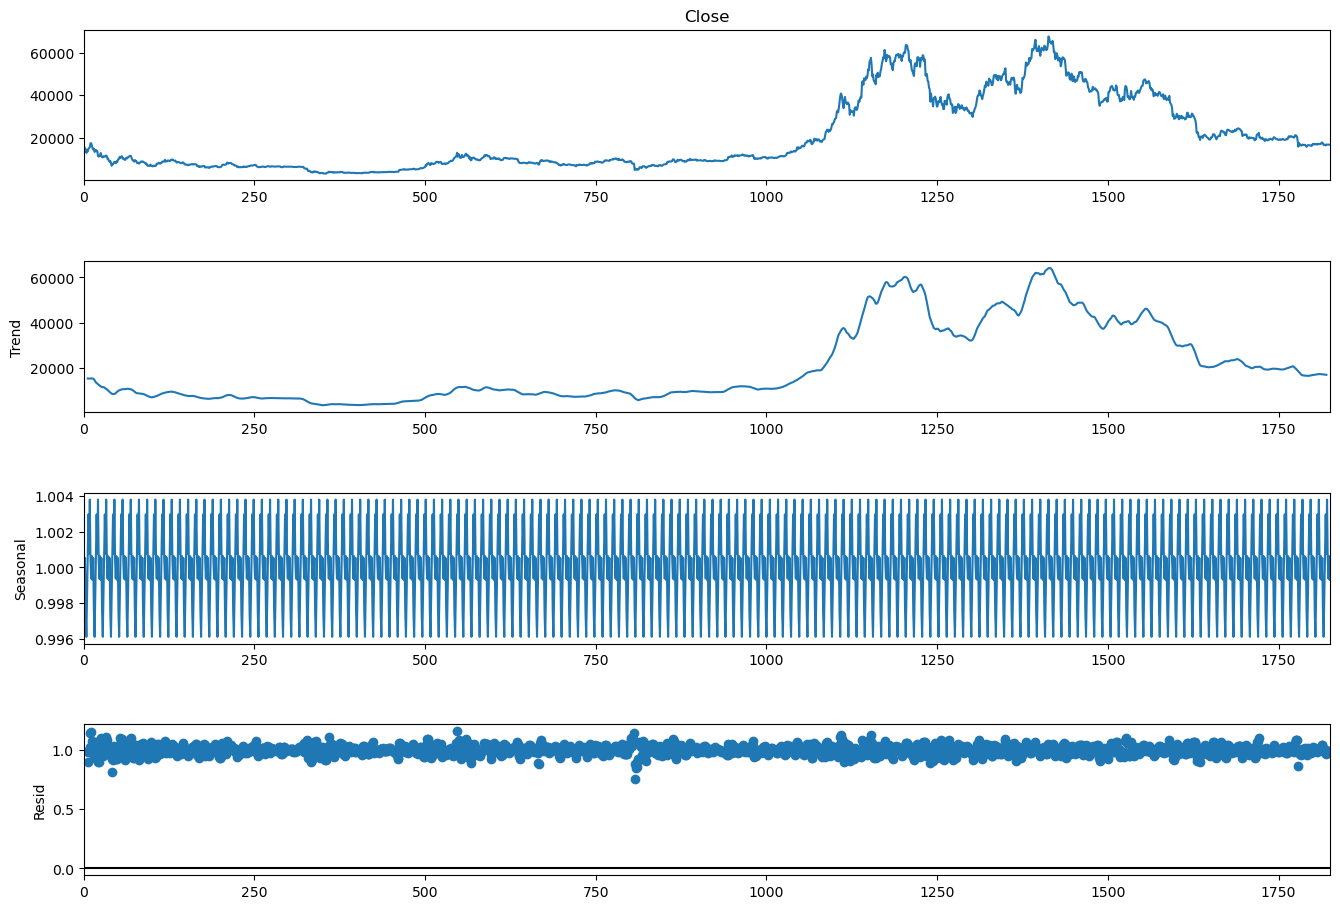

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

**As we see, the data contains the seasonality which we can capture using SARIMA model.**

## ACF and PACF
**The  autocorrelation function is the amount of correlation between a variable and a lag of itself whereas the partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.
ACF determines the order of MA part while PACF determines the AR part of the ARIMA model.**

<function matplotlib.pyplot.show(close=None, block=None)>

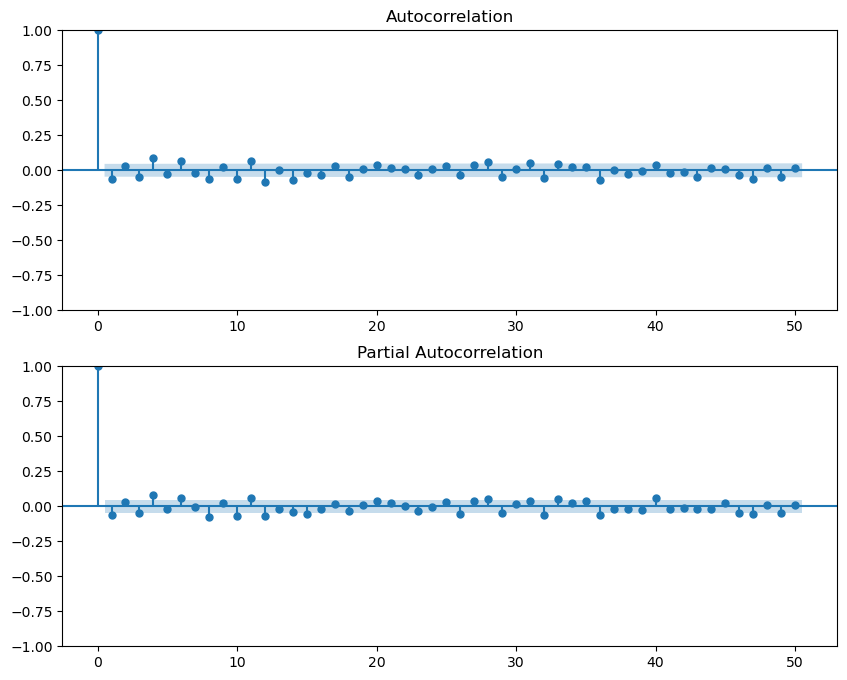

In [240]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figure = plt.figure(figsize=(10,8))
ax1 = figure.add_subplot(2,1,1)
figure = plot_acf(df['Close_FD'], lags=50, ax=ax1)
ax2 = figure.add_subplot(2,1,2)
figure = plot_pacf(df['Close_FD'], lags=50, ax=ax2)
plt.show

**According to the ACF and PACF graphs, the ARIMA model of (5,1,2) would be the appropriate one for our analysis. However, to ascertain the parameters, we will use auto ARIMA model in the next section.**

## Training and Testing Data

In [27]:
n = int(len(df1)*0.9)
df_train = pd.DataFrame(df1[:n]).rename(columns={'Close':'y_train'})
df_test = pd.DataFrame(df1[n:]).rename(columns={'Close':'y_test'})

In [28]:
df_train

,y_train
Date,
2017-12-26,16099.799805
2017-12-27,15838.500000
2017-12-28,14606.500000
2017-12-29,14656.200195
2017-12-30,12952.200195
...,...
2022-06-22,19987.029297
2022-06-23,21085.876953
2022-06-24,21231.656250


In [25]:
df_train 

,y_train
0,16099.799805
1,15838.500000
2,14606.500000
3,14656.200195
4,12952.200195
...,...
1639,19987.029297
1640,21085.876953
1641,21231.656250
1642,21502.337891


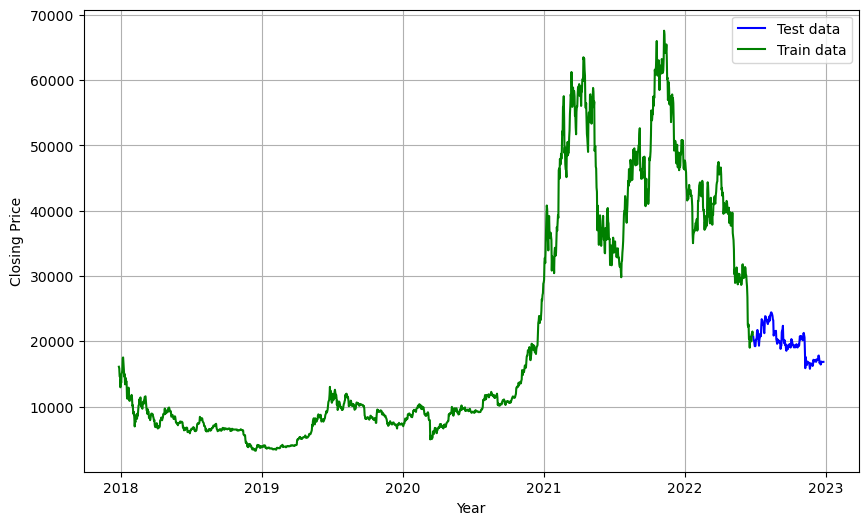

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(df_test, 'blue', label='Test data')
plt.plot(df_train, 'green', label='Train data')

plt.legend()

## SARIMA Model

### Building the Model

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm

In [32]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=5, max_d=2, max_q=5, 
                         seasonal=True, m=12,
                         max_P=5, max_D=5, max_Q=5,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=27501.806, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27512.953, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=27507.082, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=27508.075, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=27510.967, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=27504.317, Time=4.69 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=27503.680, Time=3.13 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=27492.545, Time=9.38 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=8.41 sec
 ARIMA(2,1,2)(3,0,1)[12] intercept   : AIC=27504.047, Time=14.12 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=10.02 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=27502.118, Time=5.07 sec
 ARIMA(2,1,2)(3,0,0)[12] intercept   : AIC=inf, Time=21.04 sec
 ARIMA(2,1,2)(3,0,2)[12] intercept   : AIC=27489.309, Time=25.34 sec
 ARIMA(2,1,2)(4,0,2

In [35]:
import statsmodels.api as sm
import warnings


model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(2, 1, 2),
                                seasonal_order=(3, 0, 2, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1827
Model:             SARIMAX(2, 1, 2)x(3, 0, 2, 12)   Log Likelihood              -15203.689
Date:                            Wed, 04 Jan 2023   AIC                          30427.378
Time:                                    19:57:01   BIC                          30482.476
Sample:                                         0   HQIC                         30447.702
                                           - 1827                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1263      0.461      2.444      0.015       0.223       2.029
ar.L2         -0.1533      0.455   

### Predictions

In [36]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred = model.predict(start=start,end=end)
pred

1644    20905.602202
1645    20583.991076
1646    20066.174742
1647    20223.151252
1648    19674.576333
            ...     
1822    16814.286989
1823    16863.249265
1824    16858.284813
1825    16813.091701
1826    16888.875379
Name: predicted_mean, Length: 183, dtype: float64

In [41]:
len(df_train)

1644

In [42]:
len(df_test)

183

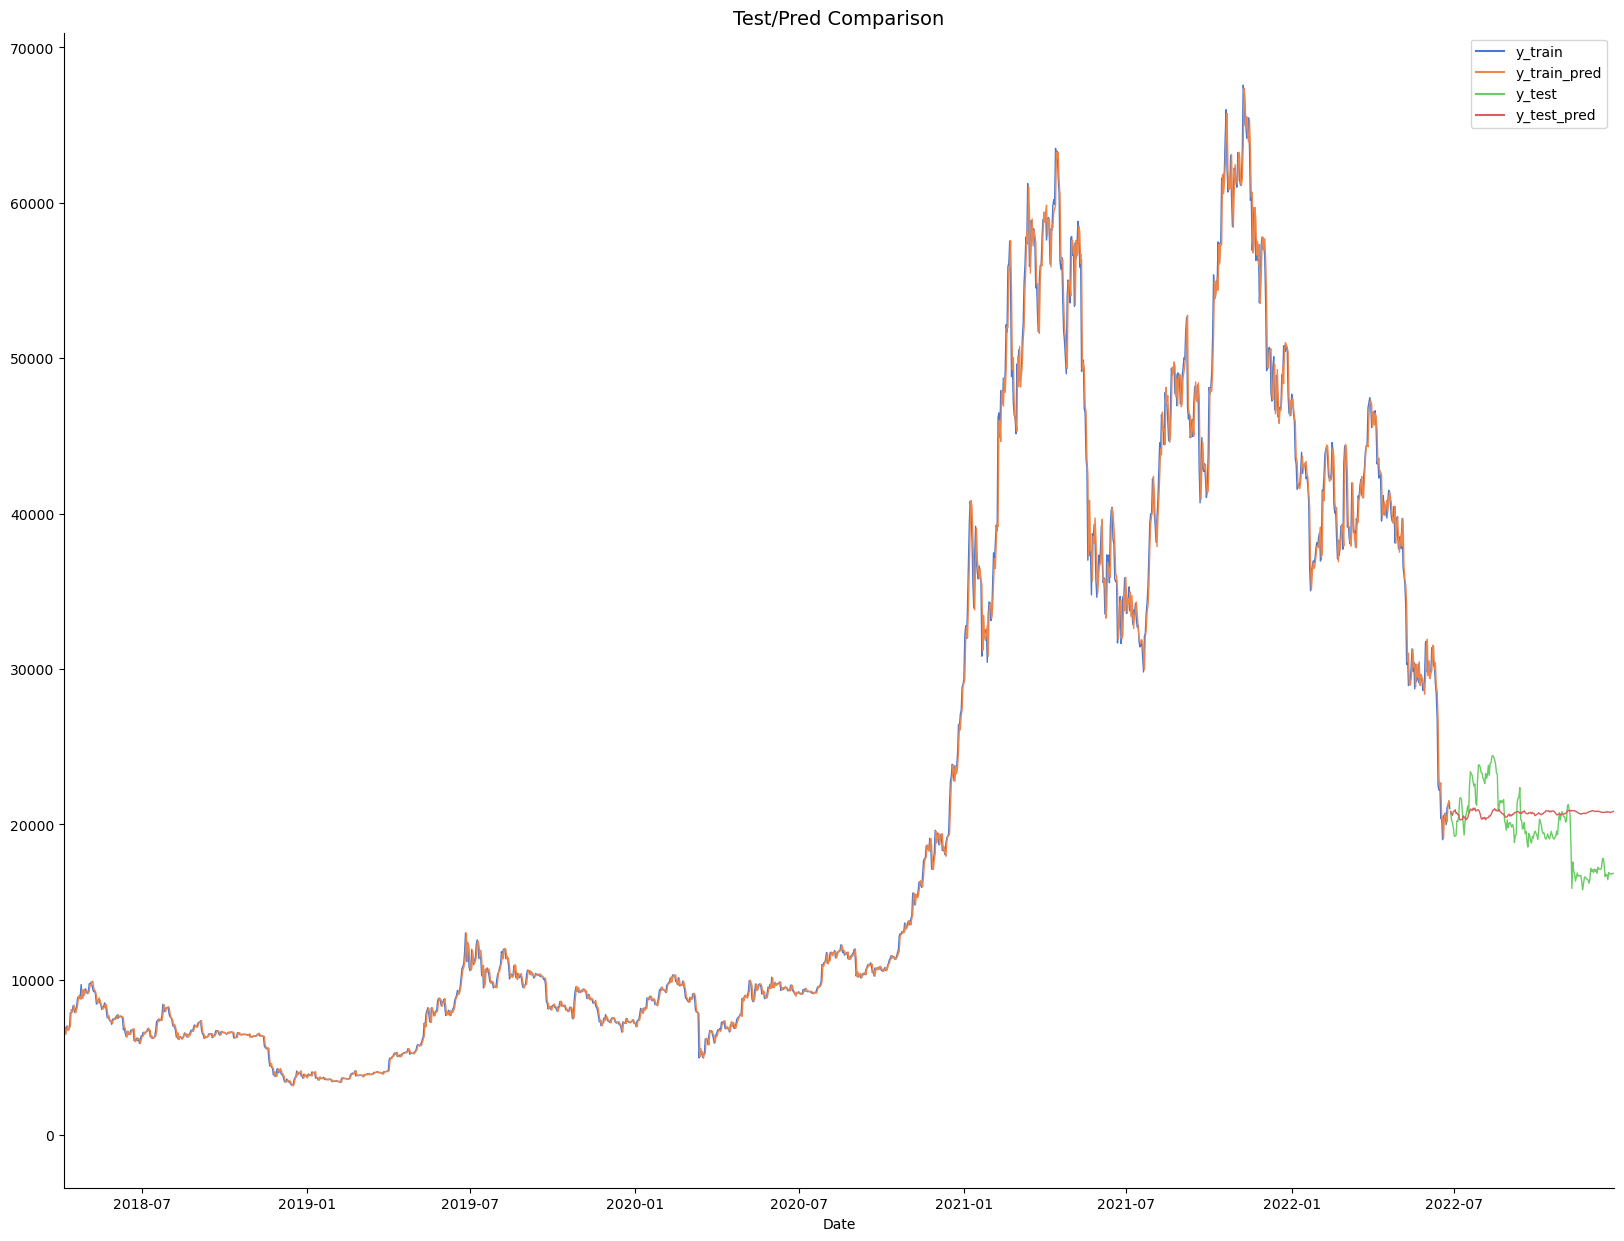

In [38]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred
test_pred = model_fit.predict(n_periods=n, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'Close':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(20, 15))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[100],df_union.index.max()])
plt.legend()

## Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [40]:
# Mean Absolute Percentage Error (MAPE)
mae = mae(df_test['y_test'], df_test['y_test_pred'])
print(f'MAE: {np.round(mae, 2)}')

# Median Absolute Percentage Error (MDAPE)
mape = mape(df_test['y_test'], df_test['y_test_pred'])*100
print(f'MAPE: {np.round(mape, 2)} %')

RMSE = np.sqrt(mean_squared_error(df_test['y_test'], df_test['y_test_pred']))
print(f'RMSE: {np.round(RMSE, 2)}')

MAE: 2020.36
MAPE: 10.83 %
RMSE: 2474.74
